<a href="https://colab.research.google.com/github/gaurav0886/Trust-and-Persuasion-in-Synthetic-Voices-Using-Psychoacoustic-Cues/blob/main/Trust_Persuasion_Voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install and Import Dependencies
!pip install librosa numpy pandas matplotlib seaborn scipy gtts pydub

import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from gtts import gTTS
from pydub import AudioSegment

In [18]:
# Generate speech
text = "I am Gaurav Sharma creating this project for my project"
tts = gTTS(text, lang='en')
tts.save("synthetic_voice.mp3")

# Convert MP3 to WAV
audio = AudioSegment.from_mp3("synthetic_voice.mp3")
audio.export("synthetic_voice.wav", format="wav")

print("Synthetic voice saved as synthetic_voice.wav")


Synthetic voice saved as synthetic_voice.wav


In [20]:
# Load and Modify Synthetic Voice
original_audio, sr = librosa.load("synthetic_voice.wav", sr=None)

# Apply pitch shift correction
pitch_shifted = librosa.effects.pitch_shift(y=original_audio, sr=sr, n_steps=4)
tempo_modified = librosa.effects.time_stretch(y=original_audio, rate=0.9)

In [21]:
# Extract Psychoacoustic Features
def extract_features(audio, sr):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr).mean()
    return [mfccs, spectral_centroid, zero_crossing_rate, spectral_bandwidth]

features_original = extract_features(original_audio, sr)
features_pitch_shifted = extract_features(pitch_shifted, sr)
features_tempo_modified = extract_features(tempo_modified, sr)

In [22]:
# Trust and Persuasion Ratings (Simulated Data)
data = {
    "Audio Sample": ["Original", "Pitch Shifted", "Tempo Modified"],
    "Trust Score": [8, 6, 7],
    "Persuasion Score": [7, 5, 6]
}
df = pd.DataFrame(data)

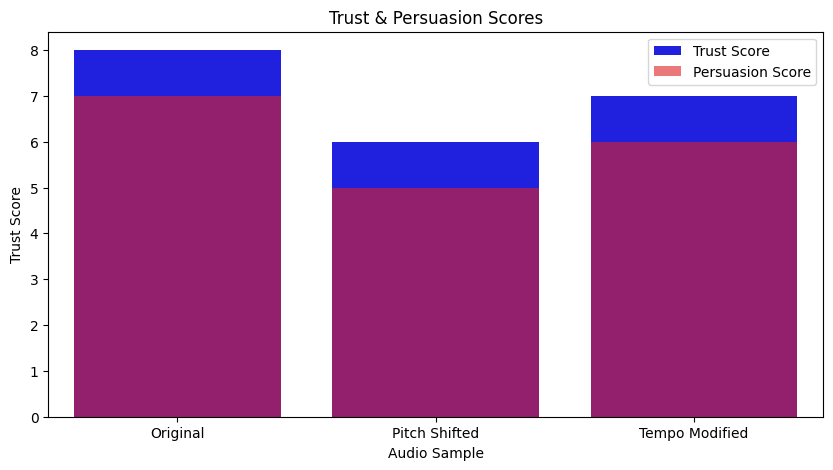

In [23]:
# Bar Chart Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x="Audio Sample", y="Trust Score", data=df, color="blue", label="Trust Score")
sns.barplot(x="Audio Sample", y="Persuasion Score", data=df, color="red", alpha=0.6, label="Persuasion Score")
plt.title("Trust & Persuasion Scores")
plt.legend()
plt.show()

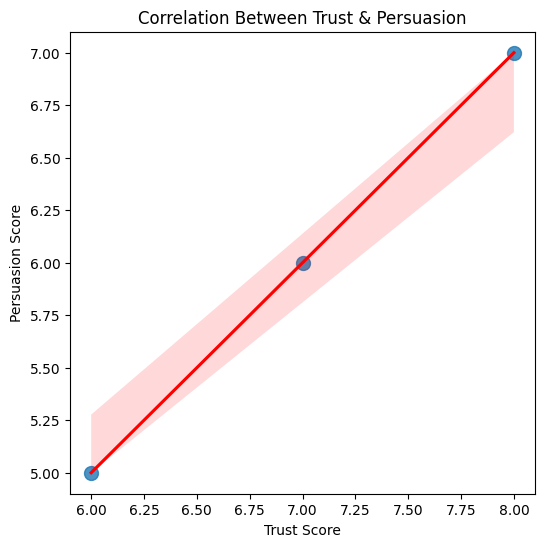

Pearson Correlation Coefficient: 1.00


In [24]:
# Scatter Plot with Regression
plt.figure(figsize=(6, 6))
sns.regplot(x=df["Trust Score"], y=df["Persuasion Score"], scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title("Correlation Between Trust & Persuasion")
plt.show()

# Calculate Pearson Correlation
correlation, _ = pearsonr(df["Trust Score"], df["Persuasion Score"])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

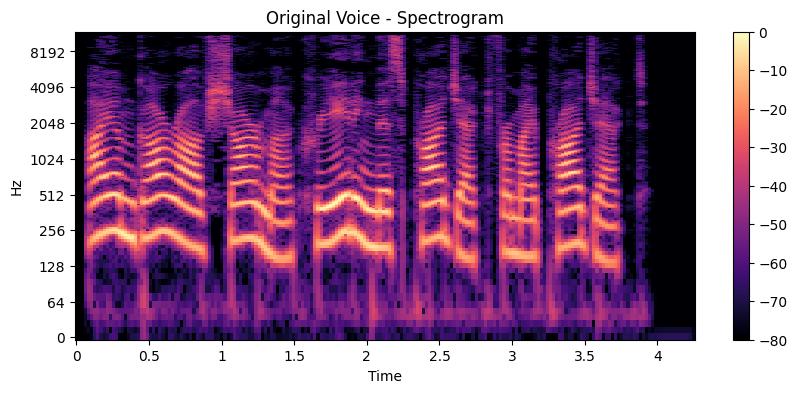

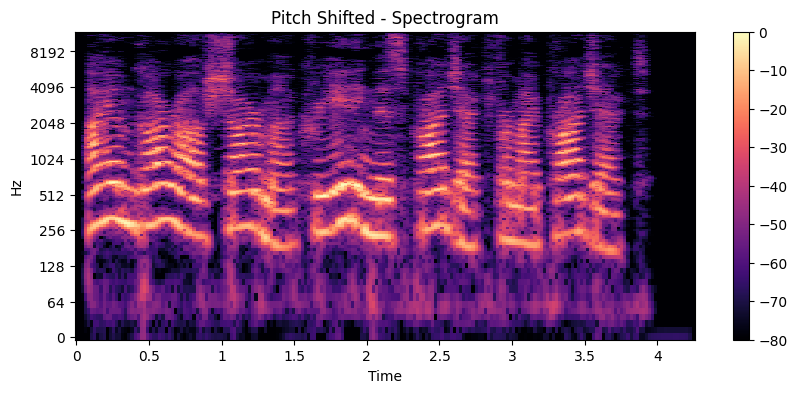

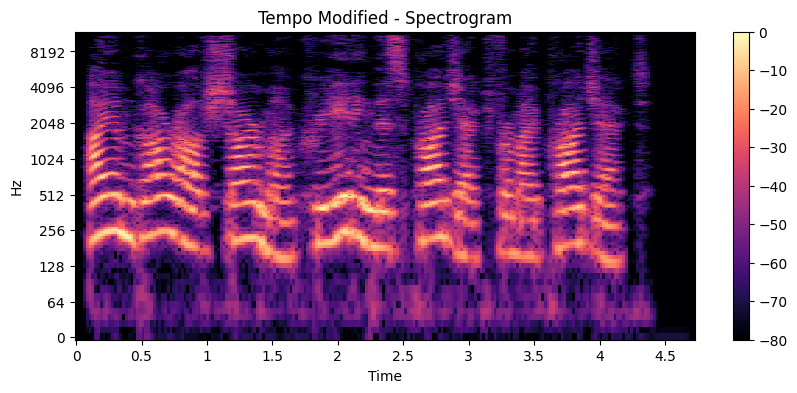

In [25]:
# Spectrograms Comparison
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_spectrogram(original_audio, sr, "Original Voice - Spectrogram")
plot_spectrogram(pitch_shifted, sr, "Pitch Shifted - Spectrogram")
plot_spectrogram(tempo_modified, sr, "Tempo Modified - Spectrogram")

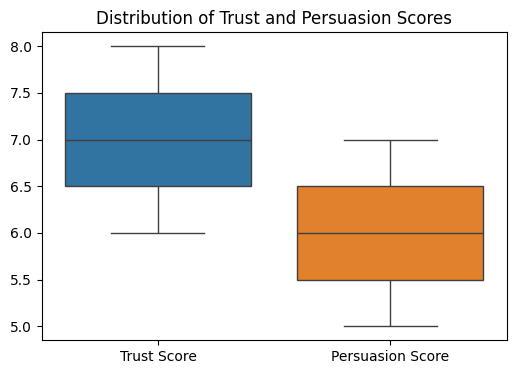

In [17]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Trust Score', 'Persuasion Score']])
plt.title("Distribution of Trust and Persuasion Scores")
plt.show()